In [126]:
from neuron import h
h.load_file('stdrun.hoc')
import numpy as np
import matplotlib.pyplot as plt
from stellate import Stellate
h.celsius = 37.0
h.dt = 0.025

In [141]:
stellate_0 = Stellate(0)
stell_theta_ic = h.IClamp(stellate_0.soma(0.5))
stellate_noise_ic = h.IClamp(stellate_0.soma(0.5))
stellate_noise_ic.dur = 1e9
stell_theta_ic.dur = 1e9

time_dur = 1000  # ms

noise_arr = np.random.normal(-5e-3,5e-3, int(time_dur / h.dt))
noise_vec = h.Vector(noise_arr)
#noise_vec.play(stellate_noise_ic._ref_amp, h.dt)  

theta_amp = 5e-3
theta_freq = 10.0
theta_arr = theta_amp * np.sin(2 * np.pi * theta_freq * np.arange(0, time_dur, h.dt) / 1000)

stell_v = h.Vector().record(stellate_0.soma(0.5)._ref_v)
stellate_gh_vec = h.Vector().record(stellate_0.soma(0.5).stellate_mech._ref_gh)
noise_input = h.Vector().record(stellate_noise_ic._ref_amp)
theta_input = h.Vector().record(stell_theta_ic._ref_amp)
time = h.Vector().record(h._ref_t)



ValueError: x and y must have same first dimension, but have shapes (0,) and (40000,)

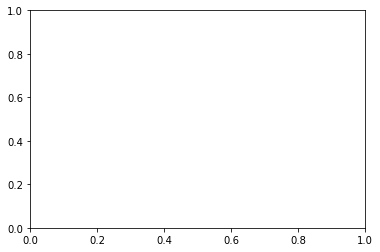

In [120]:
plt.plot(time.to_python()[1:],theta_arr)

In [142]:
h.finitialize(-65)
h.continuerun(time_dur)



0.0

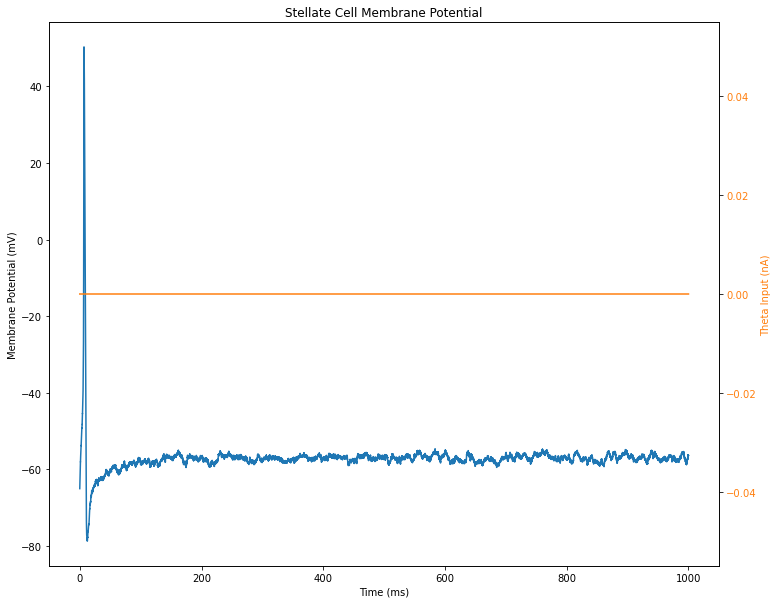

In [139]:
%matplotlib inline

fig,ax = plt.subplots(figsize=(12, 10), sharex=True)
ax1 = ax.twinx()
ax1.plot(time, theta_input.to_python(), color='C1', label='Theta Input')
ax1.set_ylabel("Theta Input (nA)", color='C1')
ax1.tick_params(axis='y', labelcolor='C1')
#plt.plot(time,noise_input.to_python())
ax.plot(time, stell_v.to_python())
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Membrane Potential (mV)")
ax.set_title("Stellate Cell Membrane Potential")
plt.show()

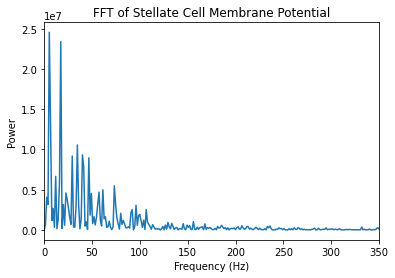

In [140]:
import analysis_utils as a_utils

fft_freq,fft_sig,fft_power = a_utils.calc_fft(stell_v.to_python()[10000:])

plt.plot(fft_freq, fft_power)
plt.xlim(0, 350)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.title("FFT of Stellate Cell Membrane Potential")
plt.show()